In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# Exercice 2

In [4]:
co2= pd.read_csv("co2_emission.csv", sep=",")

In [17]:
co2

,Entity,Code,Year,Emissions
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [9]:
nb_lignes, nb_col = co2.shape
print(nb_lignes)
print(nb_col)

20853
4


In [18]:
co2.dtypes

Entity        object
Code          object
Year           int64
Emissions    float64
dtype: object

### This dataset contains CO2 emissions for countries since 1750 until 2017

## 3 questions using pandas :

### 1- What is the total CO2 emission in 2017 ? 
### 2- Which countries has the highest CO2 emissions in 2017 ? (Top 10)
### 3- Which countries have the highest CO2 emissions since the beginning ? (Top 20)

#### 1-

In [7]:
co2.groupby("Year").Emissions.sum().sort_values()[-1:]

Year
2017    8.947275e+10
Name: Emissions, dtype: float64

#### 2-

In [32]:
co2.count()

Entity       20853
Code         18646
Year         20853
Emissions    20853
dtype: int64

In [50]:
co2[(co2.Year==2017)].sort_values(by='Emissions')[-11:]

,Entity,Code,Year,Emissions
335,Africa,NaN,2017,1.331740e+09
15694,Russia,RUS,2017,1.692795e+09
6875,Europe (other),NaN,2017,2.149073e+09
795,Americas (other),NaN,2017,2.398632e+09
9459,India,IND,2017,2.466765e+09
12735,Middle East,NaN,2017,2.671943e+09
6090,EU-28,NaN,2017,3.543683e+09
1517,Asia and Pacific (other),NaN,2017,5.071156e+09
19927,United States,USA,2017,5.269530e+09
4484,China,CHN,2017,9.838754e+09


#### 3-

In [56]:
co2.groupby("Entity").Emissions.sum().sort_values()[-20:]

Entity
Italy                       2.364600e+10
Ukraine                     2.579639e+10
Poland                      2.684882e+10
Canada                      3.191352e+10
International transport     3.679791e+10
France                      3.776808e+10
Africa                      4.311757e+10
India                       4.855786e+10
Middle East                 6.047323e+10
Japan                       6.230461e+10
United Kingdom              7.707106e+10
Germany                     9.056563e+10
Americas (other)            9.864116e+10
Russia                      1.005891e+11
Europe (other)              1.575402e+11
Asia and Pacific (other)    1.780573e+11
China                       2.001365e+11
EU-28                       3.528583e+11
United States               3.993783e+11
World                       1.575244e+12
Name: Emissions, dtype: float64

## 3 plots using Matplotlib :

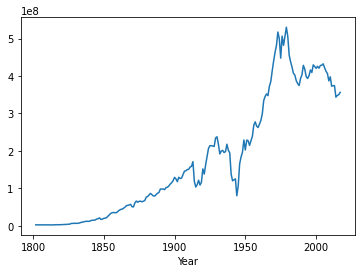

In [58]:
co2[(co2.Entity=="France")].groupby("Year").Emissions.sum().plot()

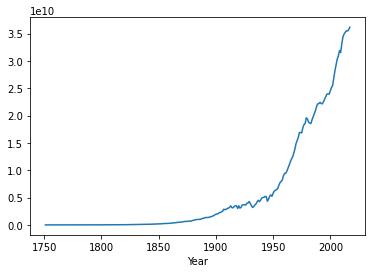

In [60]:
co2[(co2.Entity=="World")].groupby("Year").Emissions.sum().plot()

In [5]:
c2=co2[(co2.Entity == "Africa")]

In [6]:
o2 = co2[(co2.Entity == "United States")]

In [7]:
CO = pd.concat([c2, o2], axis=0)

In [102]:
CO

,Entity,Code,Year,Emissions
69,Africa,NaN,1751,0.000000e+00
70,Africa,NaN,1752,0.000000e+00
71,Africa,NaN,1753,0.000000e+00
72,Africa,NaN,1754,0.000000e+00
73,Africa,NaN,1755,0.000000e+00
...,...,...,...,...
19923,United States,USA,2013,5.519613e+09
19924,United States,USA,2014,5.568759e+09
19925,United States,USA,2015,5.420804e+09
19926,United States,USA,2016,5.310861e+09


In [8]:
CO2=CO.pivot_table('Emissions',index='Year',columns = 'Entity',aggfunc=sum)

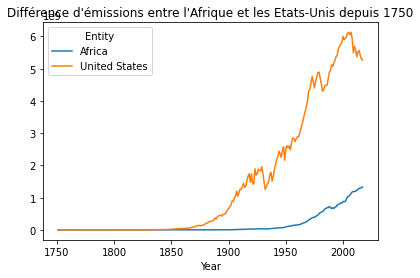

In [9]:
CO2.plot(title="Différence d'émissions entre l'Afrique et les Etats-Unis depuis 1750")